In [2]:
using UMAP
using Makie
using XLSX
using VegaDatasets
using DataFrames
using MultivariateStats
using RDatasets
using StatsBase
using Statistics
using LinearAlgebra
using Plots
using ScikitLearn
using MLBase
using Distances

In [4]:
C = DataFrame(VegaDatasets.dataset("cars"))

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower
,String,Float64?,Int64,Float64,Int64?
1,chevrolet chevelle malibu,18.0,8,307.0,130
2,buick skylark 320,15.0,8,350.0,165
3,plymouth satellite,18.0,8,318.0,150
4,amc rebel sst,16.0,8,304.0,150
5,ford torino,17.0,8,302.0,140
6,ford galaxie 500,15.0,8,429.0,198
7,chevrolet impala,14.0,8,454.0,220
8,plymouth fury iii,14.0,8,440.0,215
9,pontiac catalina,14.0,8,455.0,225


In [5]:
dropmissing!(C)
M = Matrix(C[:, 2:7])
names(C)

9-element Vector{String}:
 "Name"
 "Miles_per_Gallon"
 "Cylinders"
 "Displacement"
 "Horsepower"
 "Weight_in_lbs"
 "Acceleration"
 "Year"
 "Origin"

In [6]:
car_origin = C[:, :Origin]
carmap = labelmap(car_origin) # from MLBase
uniqueids = labelencode(carmap, car_origin)

392-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 2
 1
 1
 1
 3
 1
 1
 1

In [7]:
car_origin = C[:, :Origin]

392-element Vector{String}:
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 "USA"
 ⋮
 "USA"
 "USA"
 "USA"
 "USA"
 "Japan"
 "USA"
 "USA"
 "USA"
 "Europe"
 "USA"
 "USA"
 "USA"

In [9]:
# center and normalize the data
data = M
data = (data .- mean(data, dims = 1)) ./ std(data, dims=1)

392×6 Matrix{Float64}:
 -0.697747   1.48205    1.07591    0.663285   0.619748   -1.28362
 -1.08212    1.48205    1.48683    1.57258    0.842258   -1.46485
 -0.697747   1.48205    1.18103    1.18288    0.539692   -1.64609
 -0.953992   1.48205    1.04725    1.18288    0.53616    -1.28362
 -0.82587    1.48205    1.02813    0.923085   0.554997   -1.82732
 -1.08212    1.48205    2.24177    2.42992    1.60515    -2.00855
 -1.21024    1.48205    2.48068    3.00148    1.62045    -2.37102
 -1.21024    1.48205    2.34689    2.87158    1.57101    -2.55226
 -1.21024    1.48205    2.49023    3.13138    1.70404    -2.00855
 -1.08212    1.48205    1.86908    2.22208    1.02709    -2.55226
 -1.08212    1.48205    1.80219    1.70248    0.689209   -2.00855
 -1.21024    1.48205    1.39127    1.44268    0.743365   -2.73349
 -1.08212    1.48205    1.96464    1.18288    0.922314   -2.18979
  ⋮                                                       ⋮
  0.199113   0.309571  -0.128168   0.143685  -0.0383613   0

In [10]:
# each car is now a column, PCA takes features - by - samples matrix
data'

6×392 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.697747  -1.08212   -0.697747  …   1.09597    0.583482   0.967851
  1.48205    1.48205    1.48205      -0.862911  -0.862911  -0.862911
  1.07591    1.48683    1.18103      -0.567753  -0.711097  -0.720653
  0.663285   1.57258    1.18288      -0.531795  -0.661694  -0.583754
  0.619748   0.842258   0.539692     -0.803605  -0.415097  -0.303253
 -1.28362   -1.46485   -1.64609   …  -1.4286     1.10867    1.39865

In [12]:
p = fit(PCA, data', maxoutdim=2)

PCA(indim = 6, outdim = 2, principalratio = 0.9194828785333571)

In [13]:
P = projection(p)

6×2 Matrix{Float64}:
  0.398973  -0.244835
 -0.430615   0.148314
 -0.443531   0.108497
 -0.434122  -0.166158
 -0.430103   0.286095
  0.291926   0.892652

In [14]:
P' * (data[1,:]-mean(p))

2-element Vector{Float64}:
 -2.3230016965226925
 -0.5713519642644684

In [16]:
Yte = MultivariateStats.transform(p, data')
# notice that Yte[:,1] is the same as P'*(data[1,:-mean(p)])

2×392 Matrix{Float64}:
 -2.323     -3.20196  -2.66658   -2.60214   …   1.22011  1.70921   1.86951
 -0.571352  -0.68187  -0.992744  -0.621975     -1.87471  0.632857  0.815607

In [17]:
# reconstruct test observations (approximately)
Xr = reconstruct(p, Yte)

6×392 Matrix{Float64}:
 -0.786928  -1.11055  -0.820834  …   0.945785   0.526984   0.546196
  0.91558    1.27768   1.00103      -0.803445  -0.64215   -0.684075
  0.968334   1.34619   1.075        -0.744559  -0.689425  -0.740696
  1.1034     1.50334   1.32257      -0.218179  -0.847159  -0.947116
  0.835669   1.18209   0.862883     -1.06112   -0.554079  -0.570742
 -1.18816   -1.54341  -1.66462   …  -1.31728    1.06388    1.27381

In [18]:
norm(Xr - data') # this won't be zero

13.74384105556901

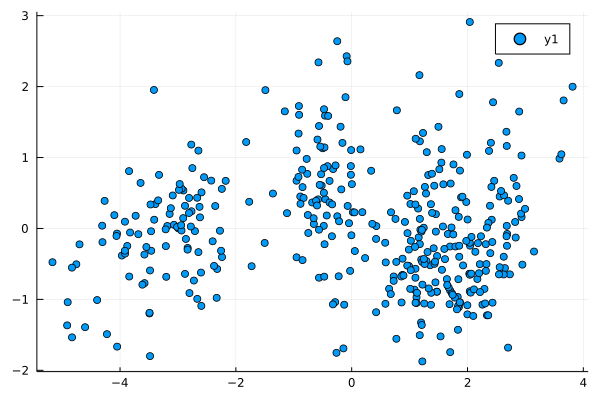

In [19]:
Plots.scatter(Yte[1,:],Yte[2,:])

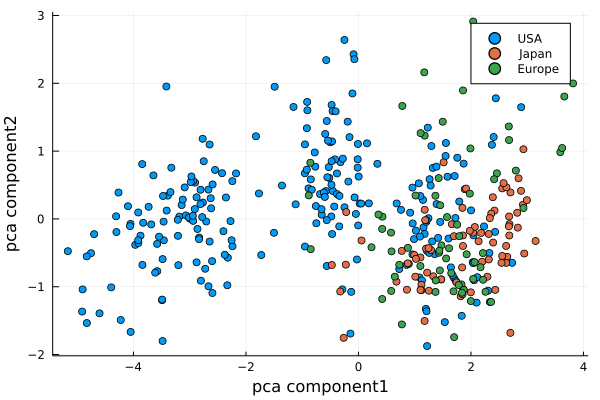

In [21]:
Plots.scatter(Yte[1,car_origin.=="USA"],Yte[2,car_origin.=="USA"],color=1,label="USA")
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")
Plots.scatter!(Yte[1,car_origin.=="Japan"],Yte[2,car_origin.=="Japan"],color=2,label="Japan")
Plots.scatter!(Yte[1,car_origin.=="Europe"],Yte[2,car_origin.=="Europe"],color=3,label="Europe")

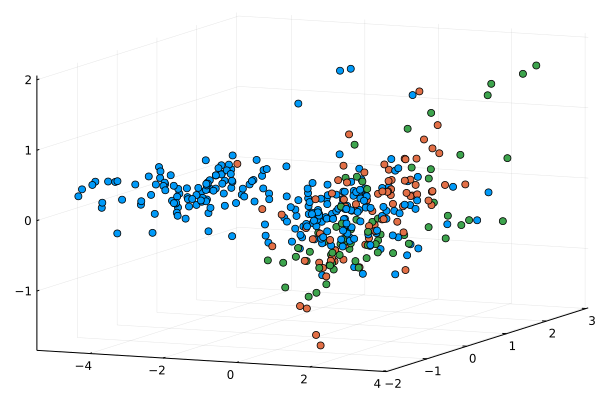

In [22]:
p = fit(PCA, data', maxoutdim=3)
Yte = MultivariateStats.transform(p, data')
scatter3d(Yte[1,:],Yte[2,:],Yte[3,:],color=uniqueids,legend=false)

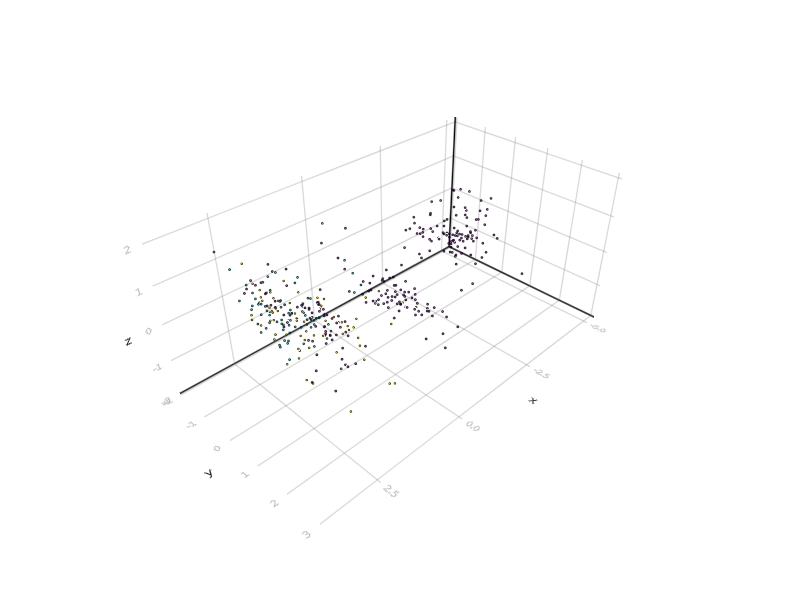

┌ Info: Makie/AbstractPlotting is caching fonts, this may take a while. Needed only on first run!
└ @ AbstractPlotting C:\Users\kgtrm\.julia\packages\AbstractPlotting\M8Nlv\src\utilities\texture_atlas.jl:113


In [30]:
scene = GLMakie.scatter(Yte[1,:],Yte[2,:],Yte[3,:], color=uniqueids)

In [31]:
using GLMakie
display(scene)

GLMakie.Screen(...)

┌ Info: Installing sklearn via the Conda scikit-learn package...
└ @ PyCall C:\Users\kgtrm\.julia\packages\PyCall\BD546\src\PyCall.jl:711
┌ Info: Running `conda install -y scikit-learn` in root environment
└ @ Conda C:\Users\kgtrm\.julia\packages\Conda\sNGum\src\Conda.jl:128


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\kgtrm\.julia\conda\3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    icc_rt-2019.0.0            |       h0cc432a_1         6.0 MB
    joblib-1.0.1               |     pyhd3eb1b0_0         208 KB
    scikit-learn-0.24.2        |   py38hf11a4ad_0         4.8 MB
    scipy-1.6.2                |   py38h66253e8_1        13.0 MB
    threadpoolctl-2.1.0        |     pyh5ca1d4c_0          17 KB
    ------------------------------------------------------------
                                           Total:        24.0 MB

The following NEW packages will be INSTALLED:

  icc_rt             pkgs/main/win-64::icc_rt-2019.0.0-h0cc432a_1
  joblib             pkgs/main/noarch::joblib-1.0.1-pyhd3eb1b0_0
  scikit-learn       pkgs/main/win-64::scikit-learn-0.24.2-p

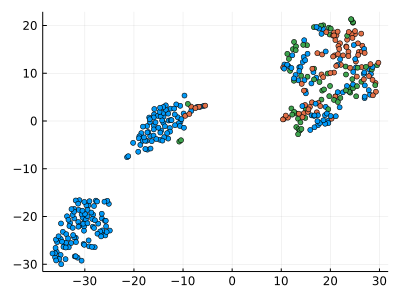

In [32]:
@sk_import manifold : TSNE
tfn = TSNE(n_components=2) #,perplexity = 20.0, early_exaggeration=50)
Y2 = tfn.fit_transform(data);
Plots.scatter(Y2[:,1],Y2[:,2],color=uniqueids,legend=false,size=(400,300),markersize=3)

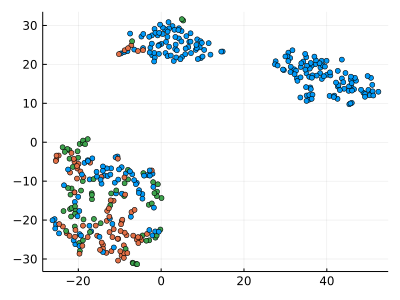

In [33]:
tfn = TSNE(n_components=2,perplexity = 20.0, early_exaggeration=50)
Y2 = tfn.fit_transform(data);
Plots.scatter(Y2[:,1],Y2[:,2],color=uniqueids,legend=false,size=(400,300),markersize=3)

In [34]:
L = cor(data, data, dims=2)
embedding = umap(L,2)

2×392 Matrix{Float64}:
 -8.94611  -8.44033  -8.61584  -8.93527  …   3.11064  8.89608  8.99995
 -2.72594  -2.35489  -3.09257  -2.67859     -3.785    1.66762  1.44028

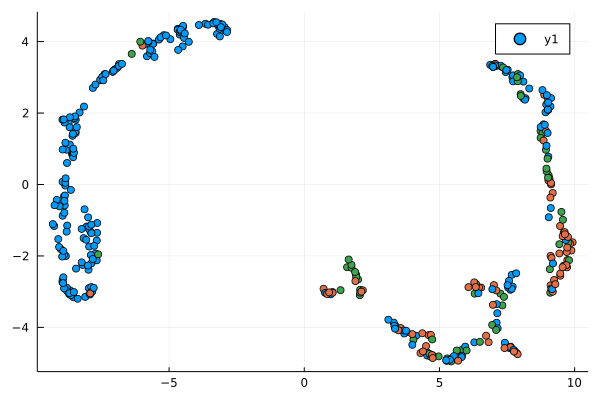

In [36]:
Plots.scatter(embedding[1,:],embedding[2,:],color=uniqueids)

In [37]:
L = pairwise(Euclidean(), data, data, dims=1)
embedding = umap(-L, 2)

2×392 Matrix{Float64}:
 -6.35134  -9.16283   -7.00126  -6.94421  …   8.11961   5.09048   5.01895
  1.81768   0.482177   1.94483   1.88621     -2.72563  -2.18599  -2.36088

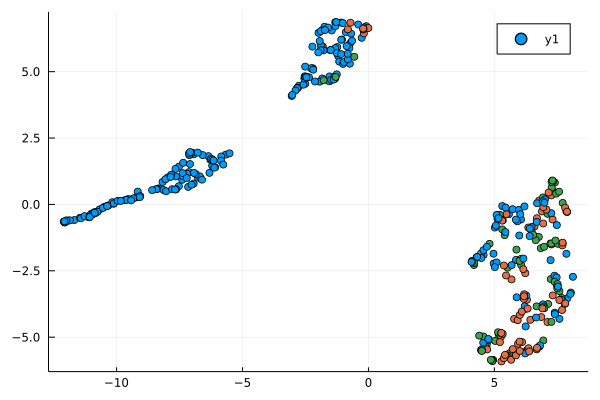

In [38]:
Plots.scatter(embedding[1,:],embedding[2,:],color=uniqueids)